In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, signal
import numdifftools as nd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

https://stackoverflow.com/questions/78568011/how-to-compute-the-derivative-of-a-spline-in-scipy-including-the-edges

In [2]:
# Example noisy data
np.random.seed(42)
NTime = 100
time = np.linspace(0, 1,  NTime)
y_true = np.sin(2 * np.pi * time)
y_noisy = y_true + np.random.normal(scale=0.1, size=time.shape)

In [3]:
kernel = 1 * RBF()
gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=0.1**2)
gaussian_process.fit(time.reshape(-1,1), y_noisy)

GaussianProcessRegressor(alpha=0.010000000000000002,
                         kernel=1**2 * RBF(length_scale=1))

In [4]:
t = np.linspace(time.min(), time.max(), 1000)

In [5]:
yhat = gaussian_process.predict(t.reshape(-1,1))

In [6]:
diff = nd.Derivative(yhat)

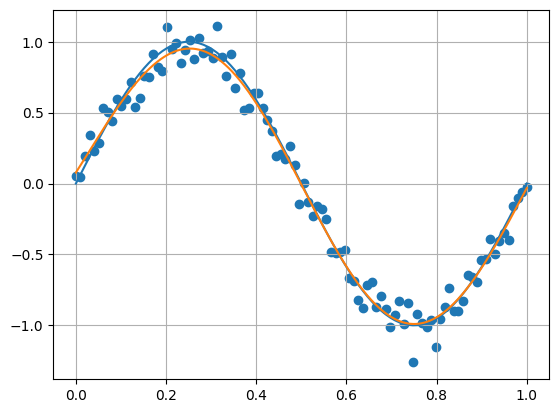

In [9]:
fig, axe = plt.subplots()
axe.scatter(time, y_noisy)
axe.plot(time, y_true)
axe.plot(t, yhat)
axe.grid()